## EDA and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file
df = pd.read_csv("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
# Check for datatypes
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [4]:
# Check for imbalanced data
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [5]:
# Check for missing values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df[df['description'].isnull()]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17513,17514,Office Manager,"PL, MZ, Warsaw",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [7]:
df = df.dropna(subset=['description'])

In [8]:
## Aggregate location column into country, state, and city columns
df['country'] = df['location'].str.split(",").str[0].str.strip().str.lower()
df['state'] = df['location'].str.split(",").str[1].str.strip().str.lower()
df['city'] = df['location'].str.split(",").str[2].str.strip().str.lower()

df = df.drop(columns=['location'])

/var/folders/8h/ky2tt7wj11g8x4whjkly0n7r0000gn/T/ipykernel_1063/2811056956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['location'].str.split(",").str[0].str.strip().str.lower()
/var/folders/8h/ky2tt7wj11g8x4whjkly0n7r0000gn/T/ipykernel_1063/2811056956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['location'].str.split(",").str[1].str.strip().str.lower()
/var/folders/8h/ky2tt7wj11g8x4whjkly0n7r0000gn/T/ipykernel_1063/2811056956.py:4: SettingWithCopyWarning: 


In [9]:
# Create boolean columns which contain information whether the referred column has NA values
df['salary_na'] = df['salary_range'].isna().astype(int)
df['department_na'] = df['department'].isna().astype(int)
df['company_profile_na'] = df['company_profile'].isna().astype(int)
df['requirements_na'] = df['requirements'].isna().astype(int)
df['benefits_na'] = df['benefits'].isna().astype(int)
df['employment_type_na'] = df['employment_type'].isna().astype(int)
df['required_experience_na'] = df['required_experience'].isna().astype(int)
df['required_education_na'] = df['required_education'].isna().astype(int)
df['industry_na'] = df['industry'].isna().astype(int)
df['function_na'] = df['function'].isna().astype(int)
df['country_na'] = df['country'].isna().astype(int)
df['state_na'] = df['state'].isna().astype(int)
df['city_na'] = df['city'].isna().astype(int)

In [10]:
df.head()

,job_id,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,requirements_na,benefits_na,employment_type_na,required_experience_na,required_education_na,industry_na,function_na,country_na,state_na,city_na
0,1,Marketing Intern,Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,...,0,1,0,0,1,1,0,0,0,0
1,2,Customer Service - Cloud Video Production,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,...,0,1,1,1,1,1,1,0,0,0
3,4,Account Executive - Washington DC,Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Bill Review Manager,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Exploratory Data Analysis (Visualizations)

##### Bar plot for Fraudulent Column value counts

/var/folders/8h/ky2tt7wj11g8x4whjkly0n7r0000gn/T/ipykernel_1063/4246459293.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


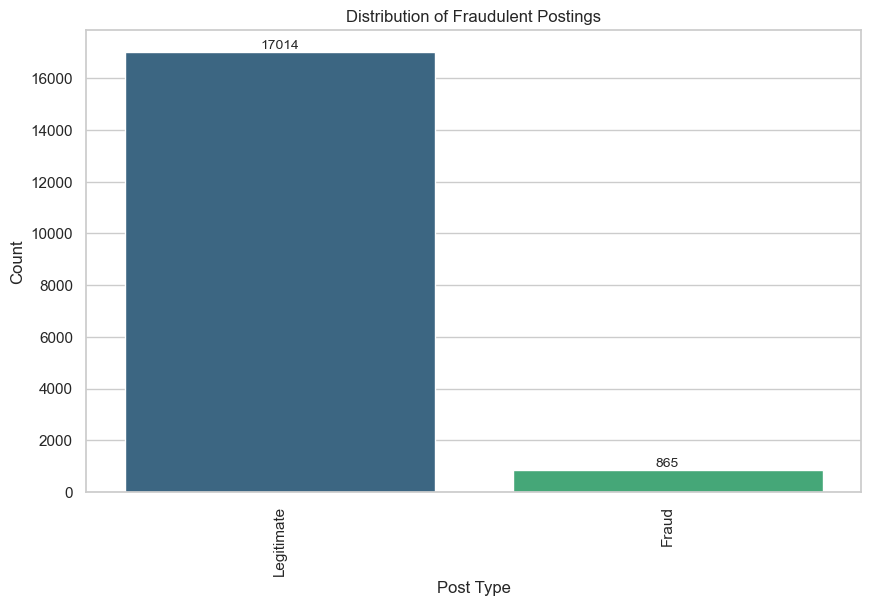

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

xdata = df['fraudulent'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=xdata.index, 
    y=xdata.values, 
    palette="viridis"
)

# Set the title and labels
plt.title('Distribution of Fraudulent Postings')
plt.xlabel('Post Type')  # Adding label for x-axis
plt.ylabel('Count')

# Customize the x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraud'], rotation=90)

# Annotate each bar with the count value
for i, bar in enumerate(barplot.patches):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position at the center of the bar
        bar.get_height(),                  # Y position slightly above the bar
        f'{int(bar.get_height())}',        # Text: count value
        ha='center', va='bottom',         # Center align horizontally and vertically
        fontsize=10                        # Font size for readability
    )

# Show the plot
plt.show()



##### Bar plot for categorical columns' value counts

/var/folders/8h/ky2tt7wj11g8x4whjkly0n7r0000gn/T/ipykernel_1063/297162015.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_col, data=df, palette="viridis")


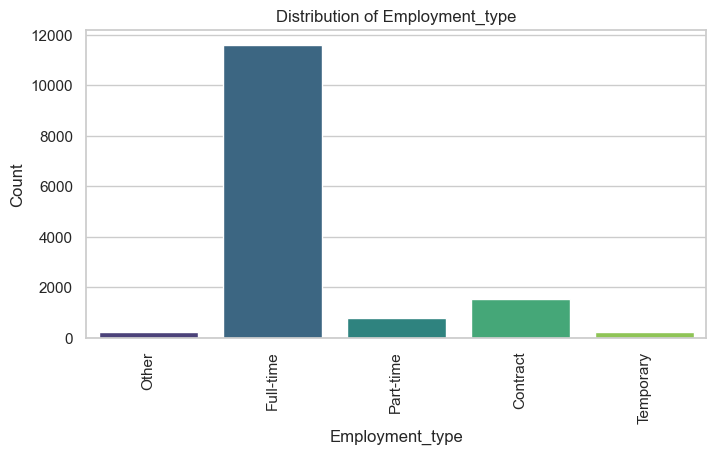

/var/folders/8h/ky2tt7wj11g8x4whjkly0n7r0000gn/T/ipykernel_1063/297162015.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_col, data=df, palette="viridis")


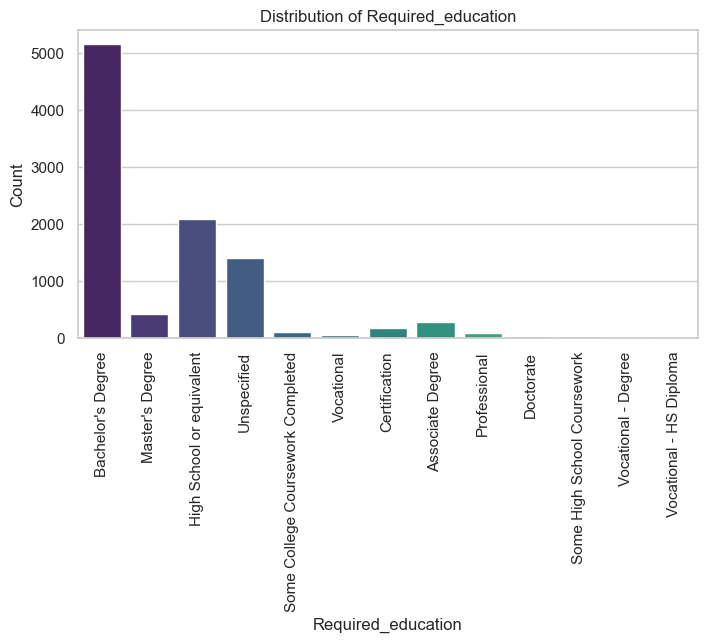

/var/folders/8h/ky2tt7wj11g8x4whjkly0n7r0000gn/T/ipykernel_1063/297162015.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


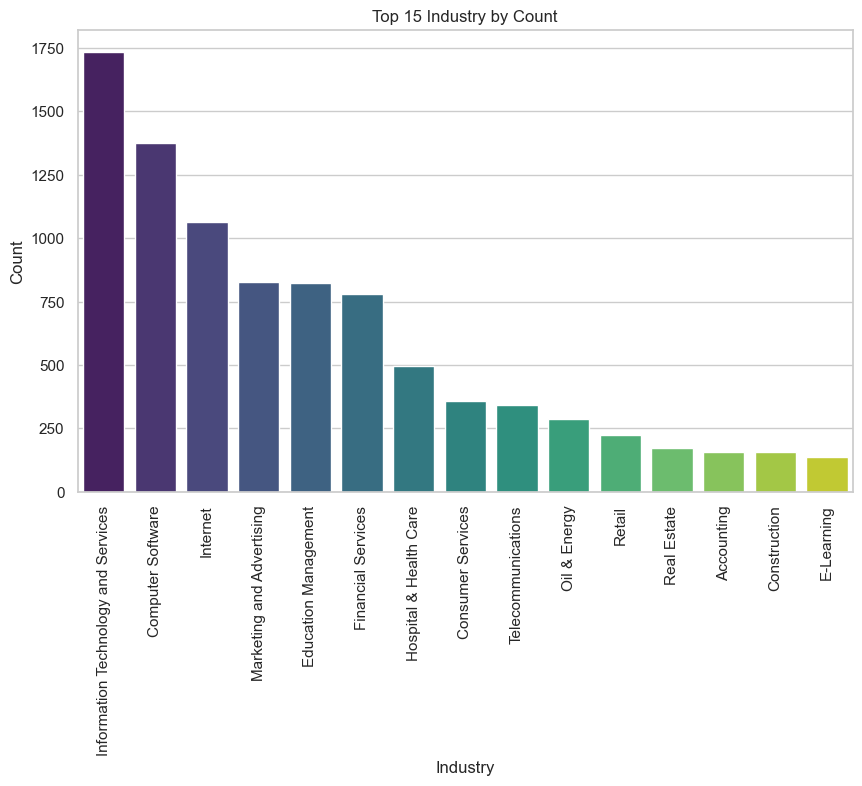

/var/folders/8h/ky2tt7wj11g8x4whjkly0n7r0000gn/T/ipykernel_1063/297162015.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


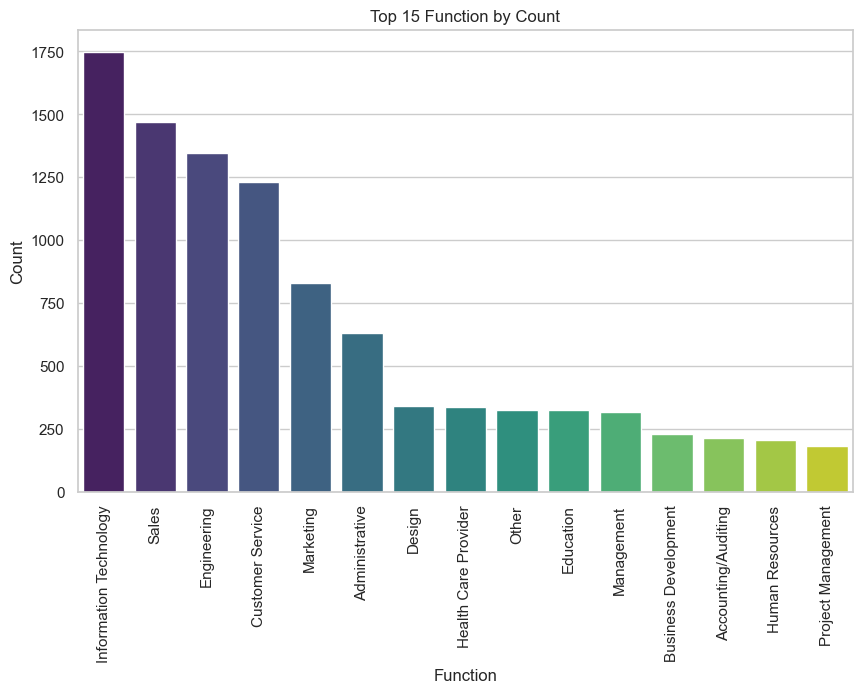

In [11]:
# Set the style for seaborn
sns.set(style="whitegrid")

columns_to_plot = ['employment_type', 'required_education', 'industry', 'function']

# Visualize categorical data
columns_to_plot = ['employment_type', 'required_education', 'industry', 'function']

# Visualize categorical data
for cat_col in columns_to_plot:
    if df[cat_col].nunique() > 30:  # Check if there are more than 30 unique categories
        # Calculate the top 15 categories by count
        top_15 = df[cat_col].value_counts().head(15)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x=top_15.index, 
            y=top_15.values, 
            palette="viridis"
        )
        plt.title(f'Top 15 {cat_col.capitalize()} by Count')
        plt.xlabel(cat_col.capitalize())
        plt.xticks(rotation=90)
        plt.ylabel('Count')
        plt.show()
    else:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=cat_col, data=df, palette="viridis")
        plt.title(f'Distribution of {cat_col.capitalize()}')
        plt.xlabel(cat_col.capitalize())
        plt.xticks(rotation=90)
        plt.ylabel('Count')
        plt.show()


##### Bar plots for Fraud Percentage in categorical and is_NA columns

<Figure size 1400x800 with 0 Axes>

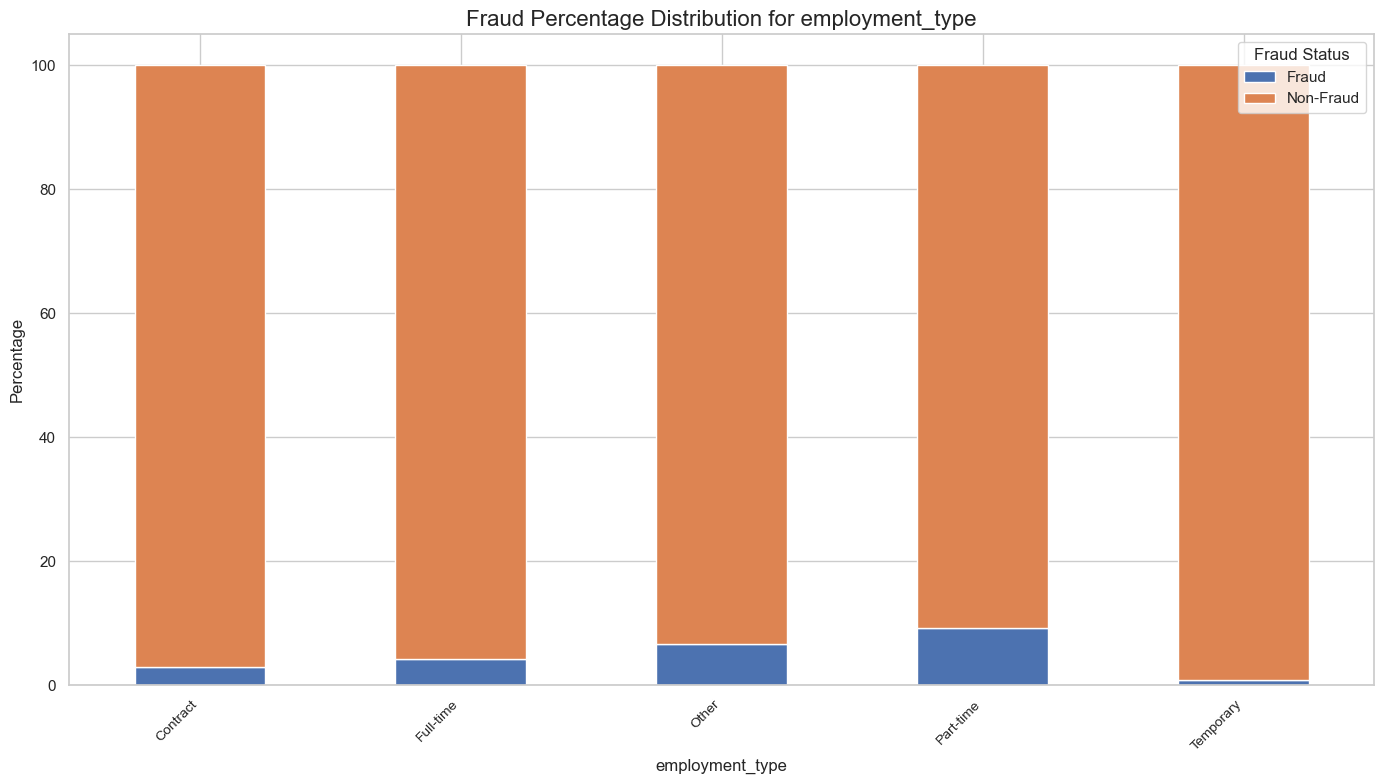

<Figure size 1400x800 with 0 Axes>

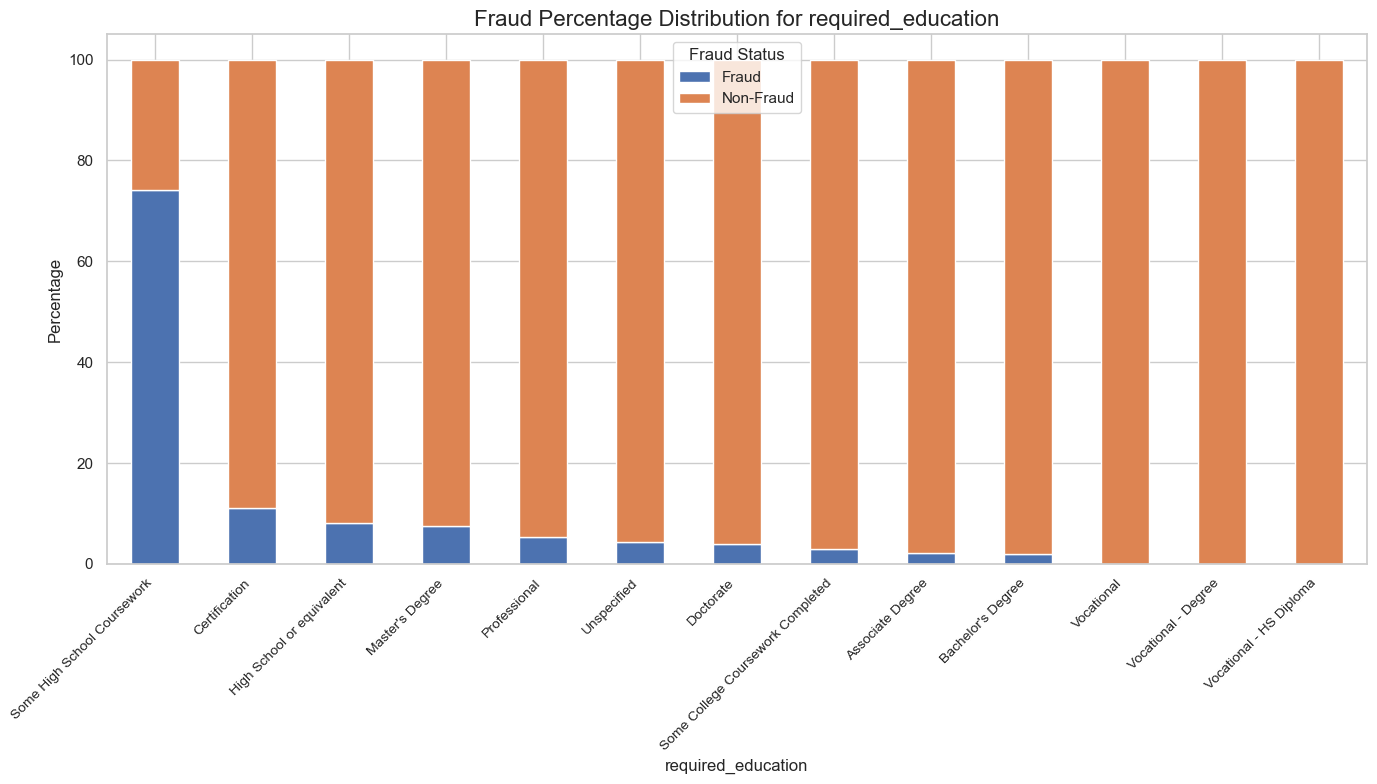

<Figure size 1400x800 with 0 Axes>

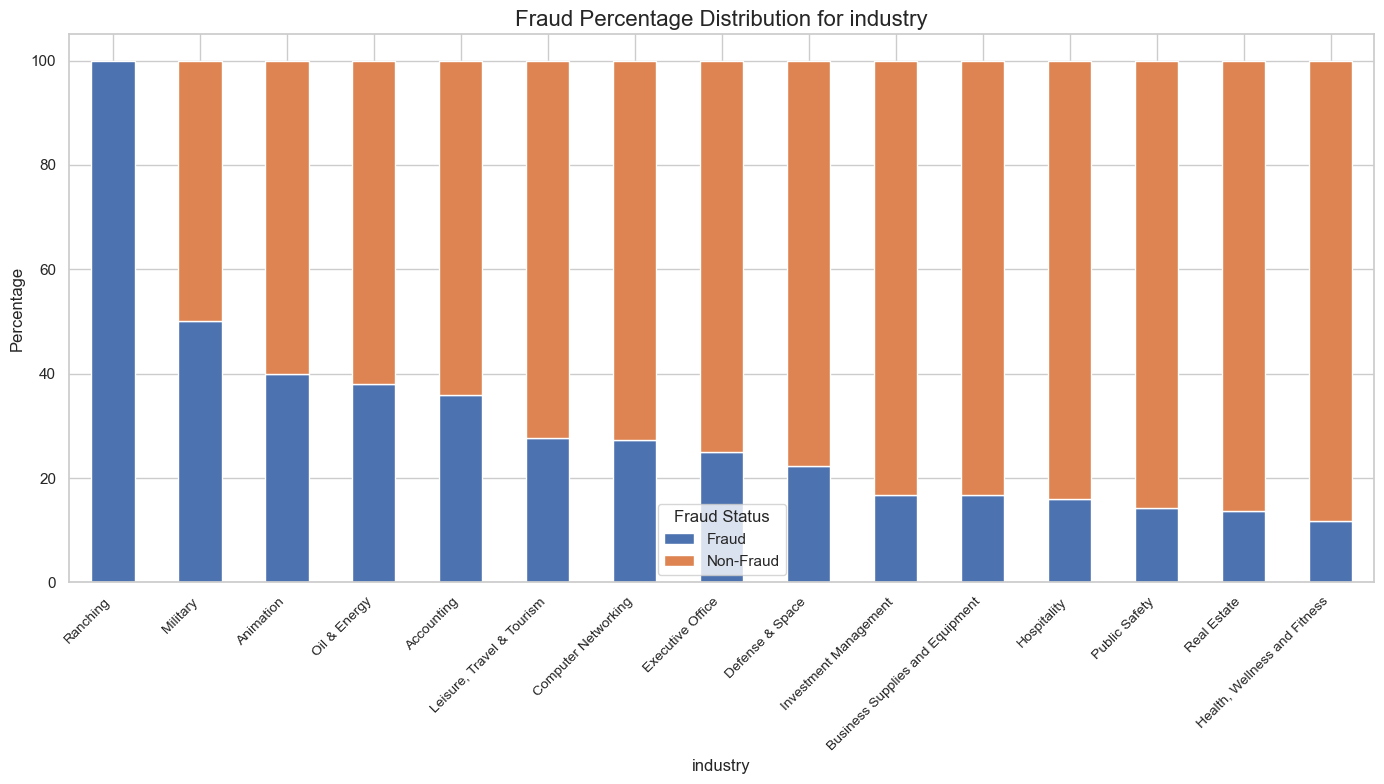

<Figure size 1400x800 with 0 Axes>

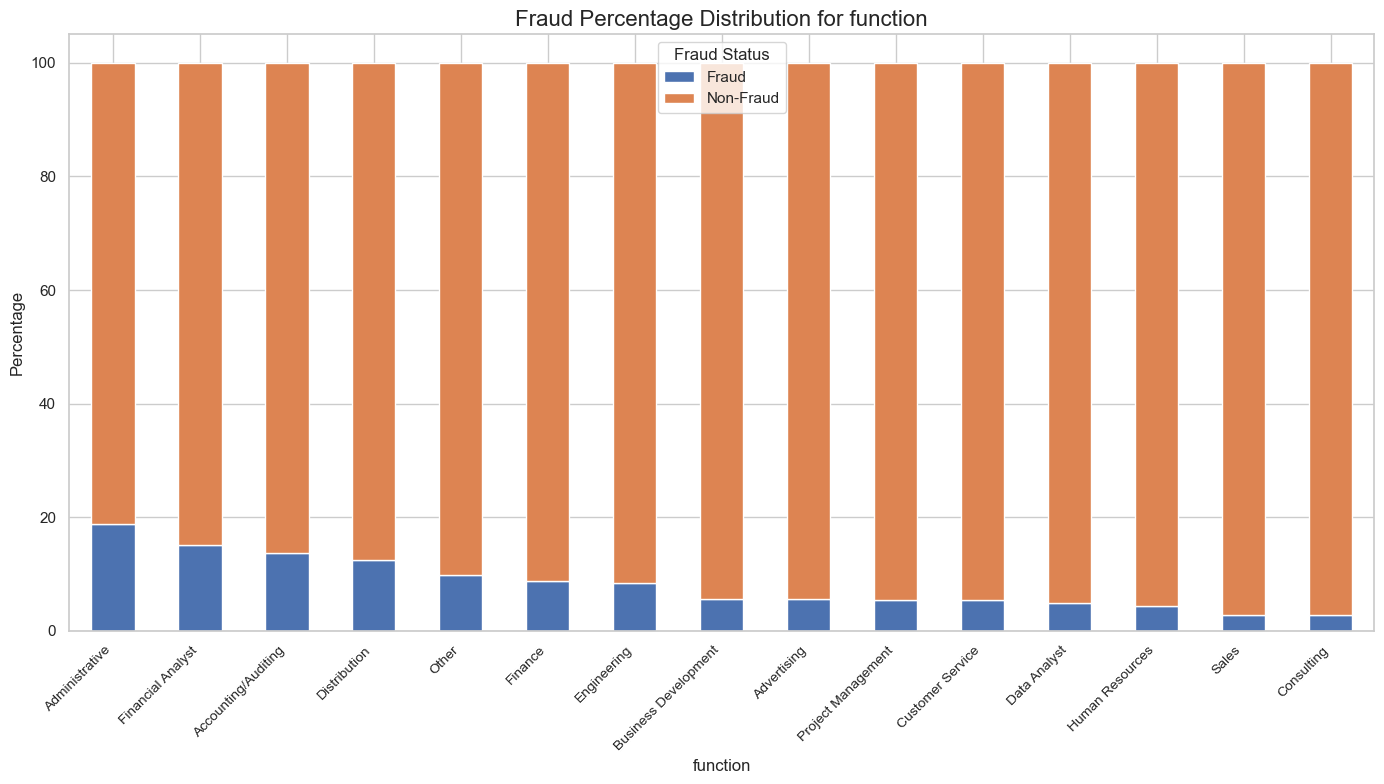

<Figure size 1400x800 with 0 Axes>

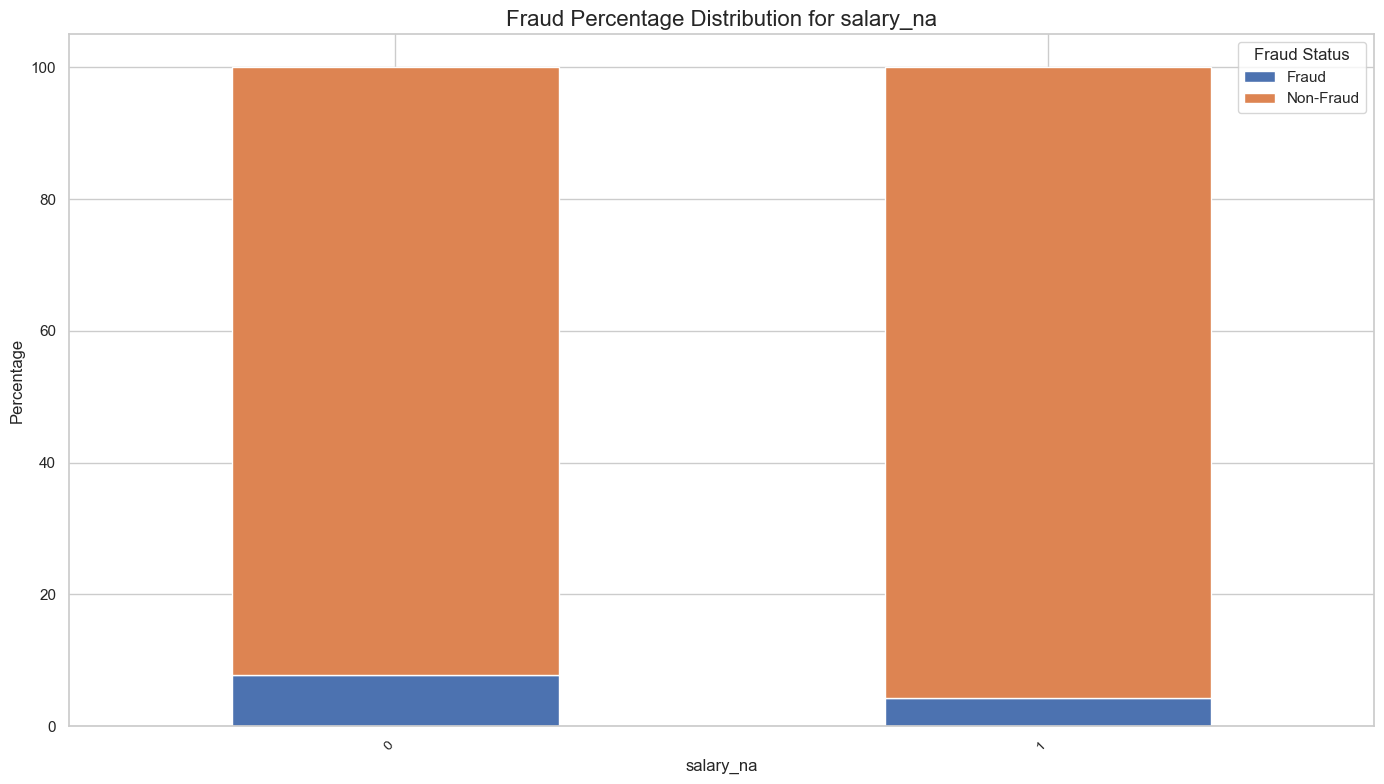

<Figure size 1400x800 with 0 Axes>

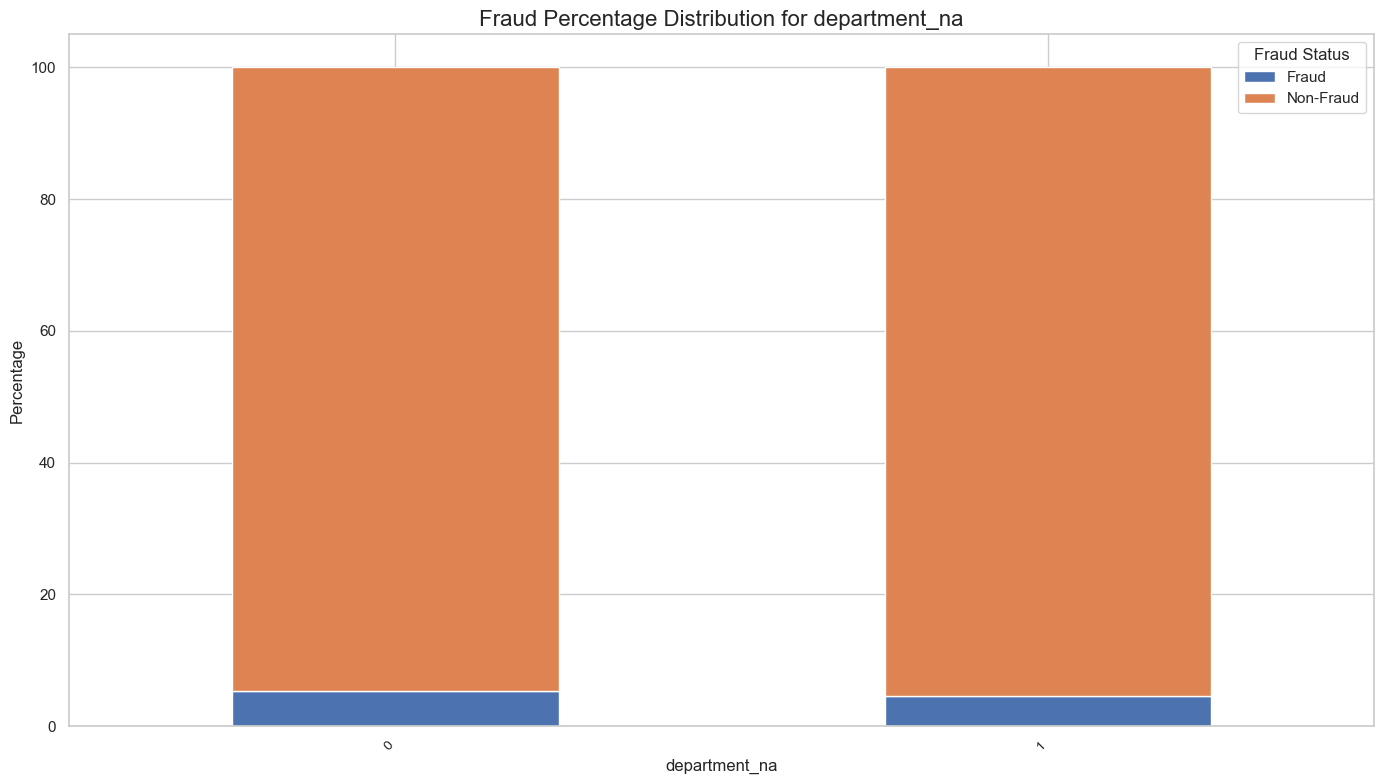

<Figure size 1400x800 with 0 Axes>

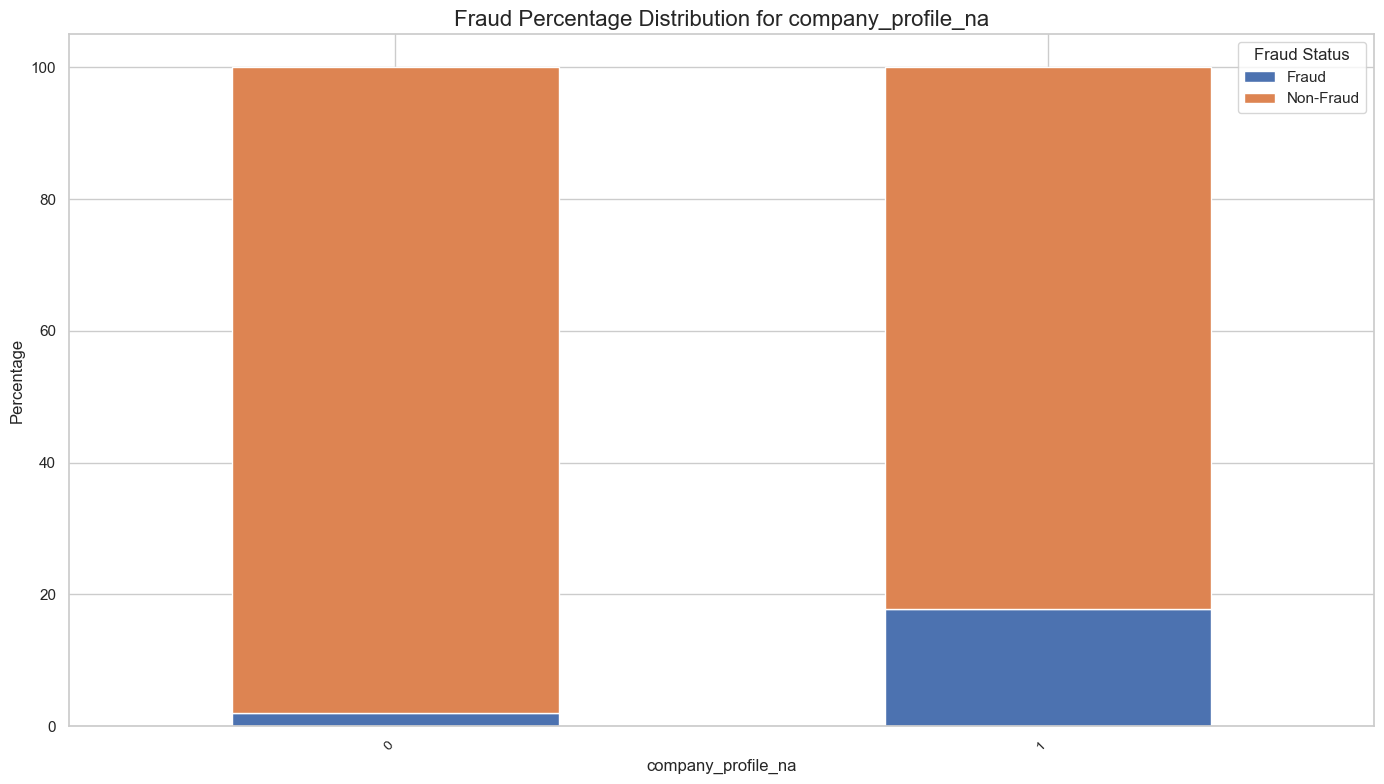

<Figure size 1400x800 with 0 Axes>

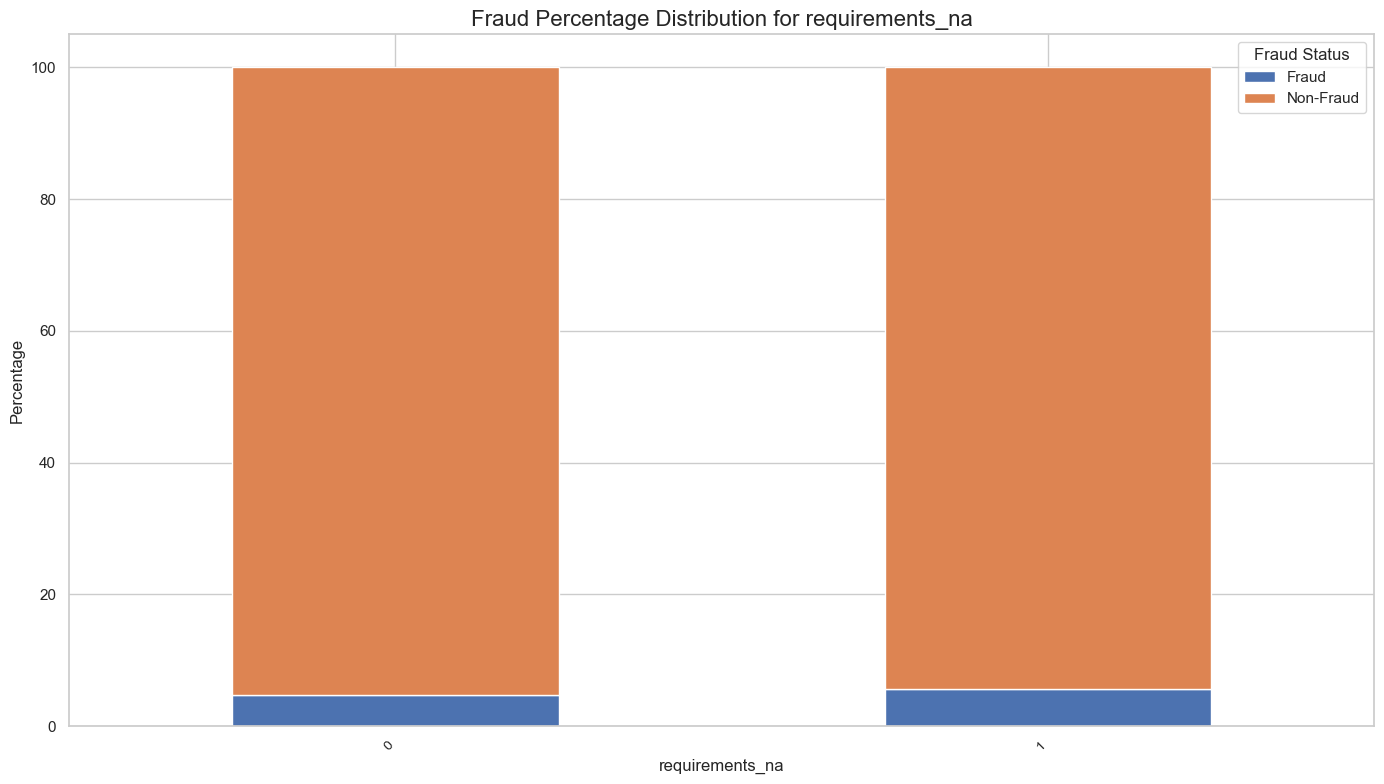

<Figure size 1400x800 with 0 Axes>

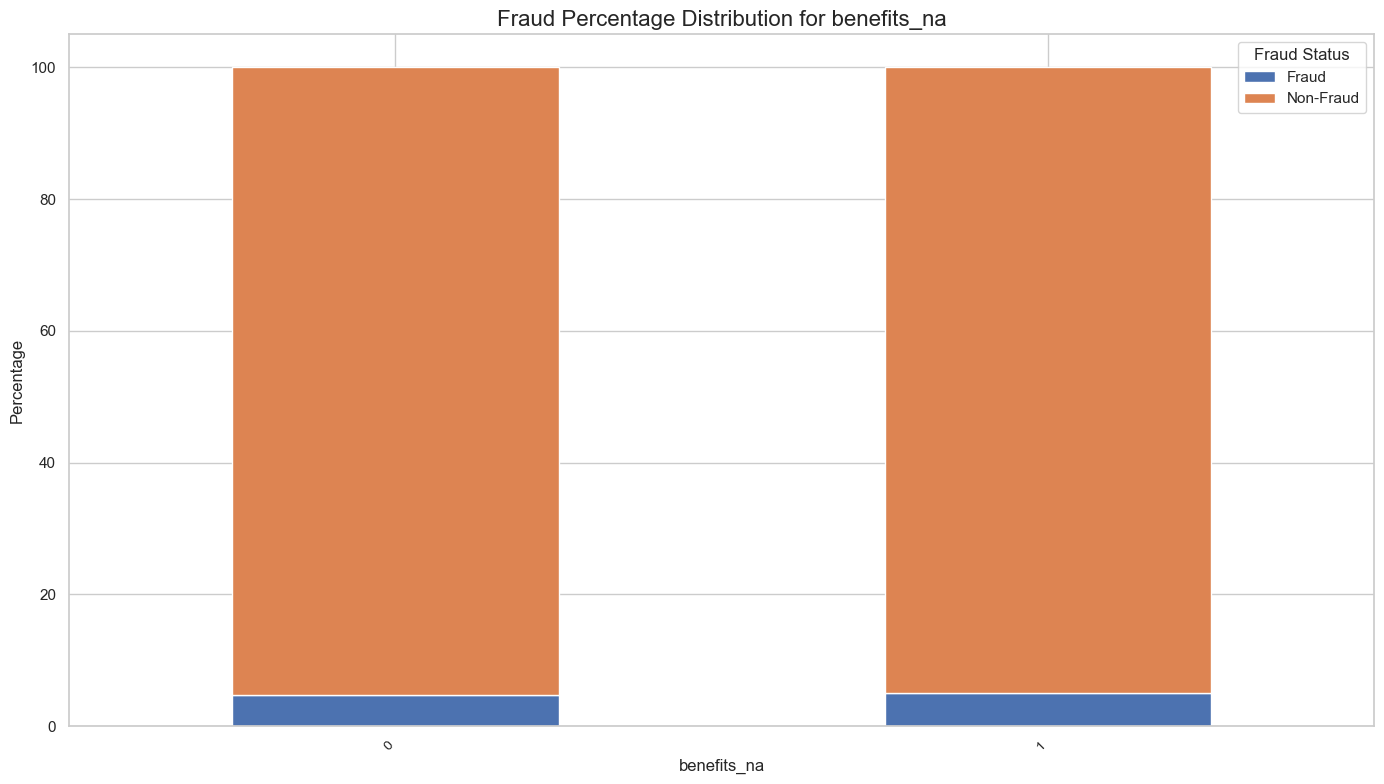

<Figure size 1400x800 with 0 Axes>

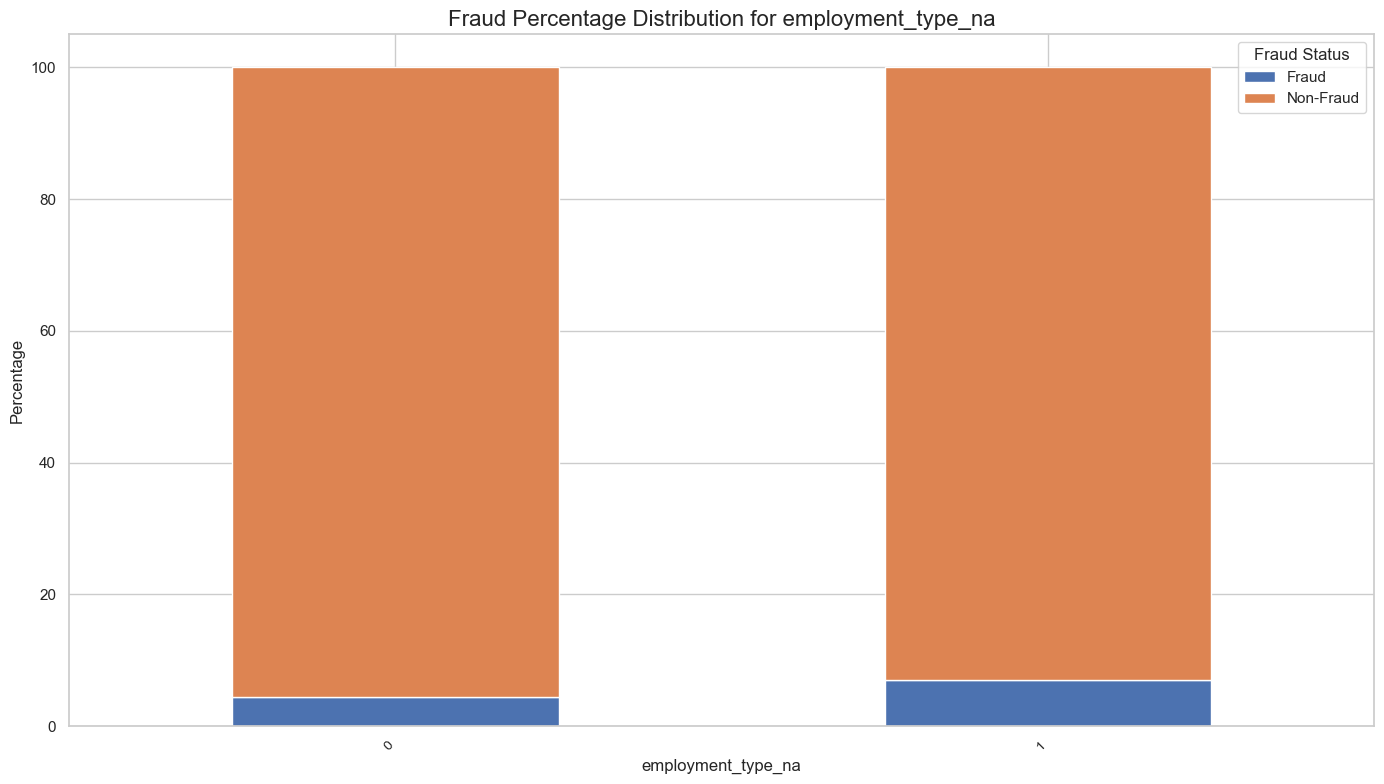

<Figure size 1400x800 with 0 Axes>

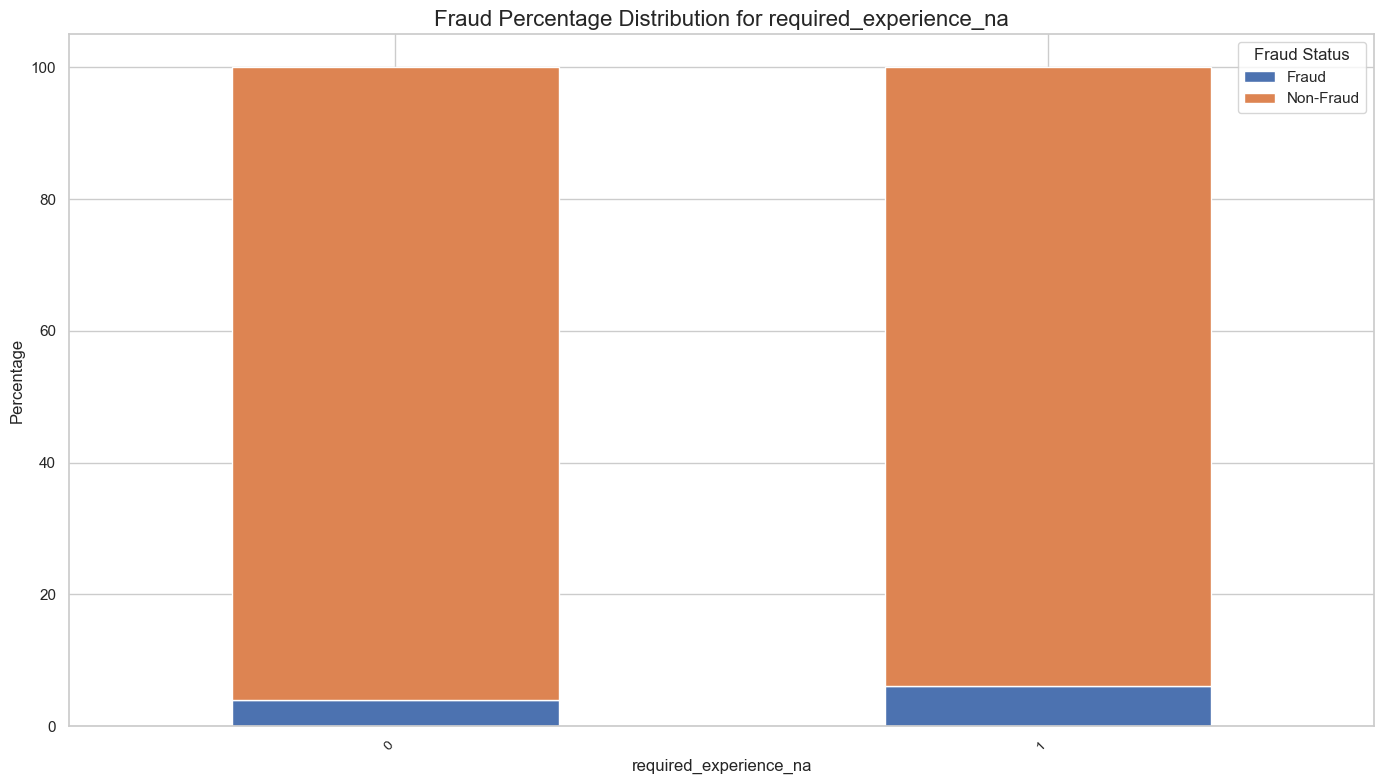

<Figure size 1400x800 with 0 Axes>

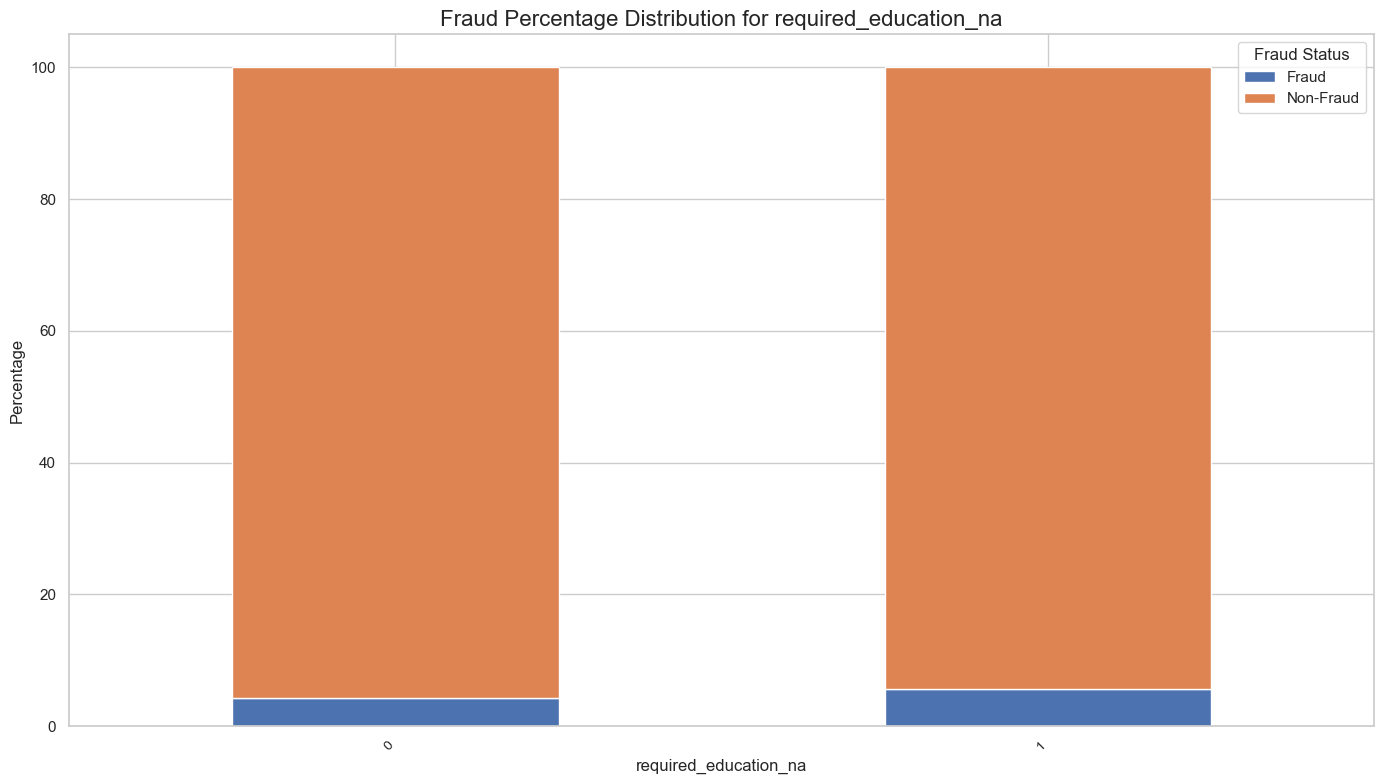

<Figure size 1400x800 with 0 Axes>

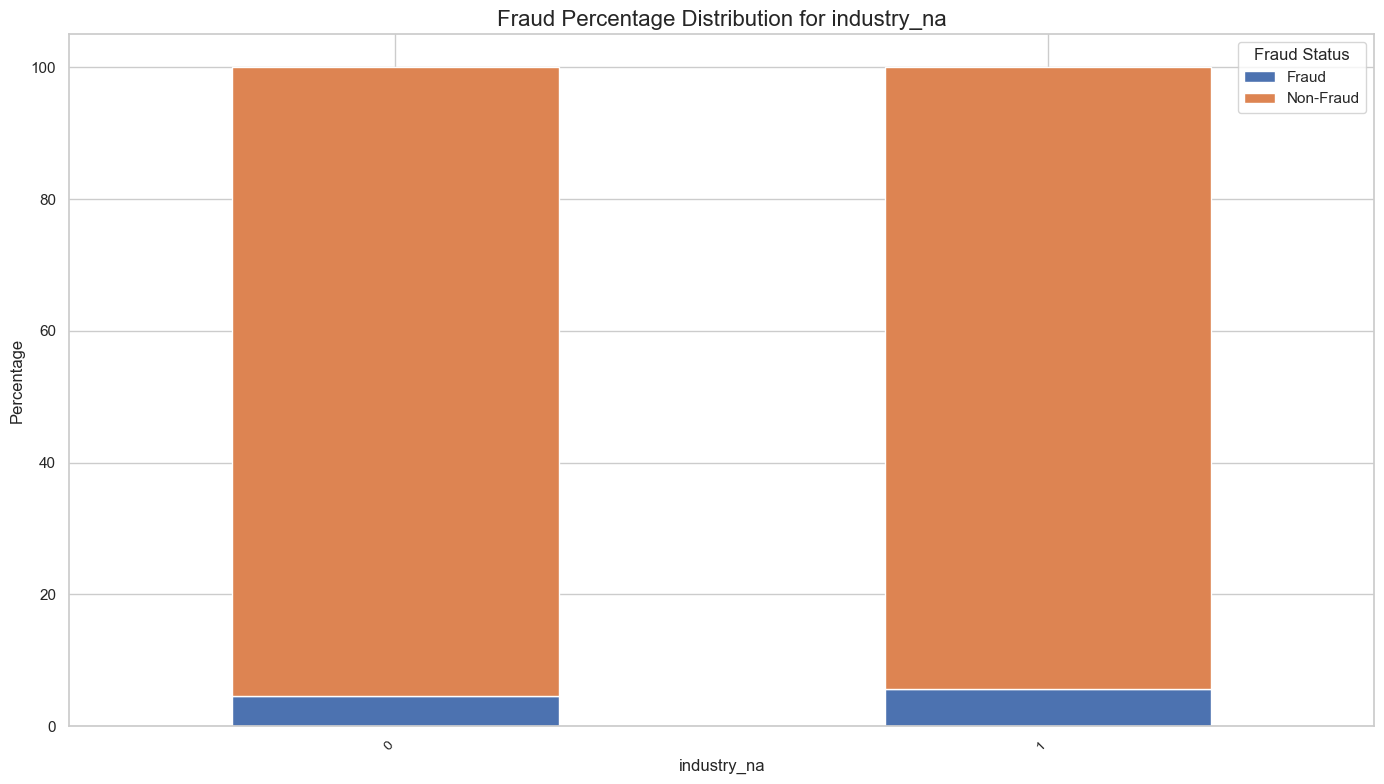

<Figure size 1400x800 with 0 Axes>

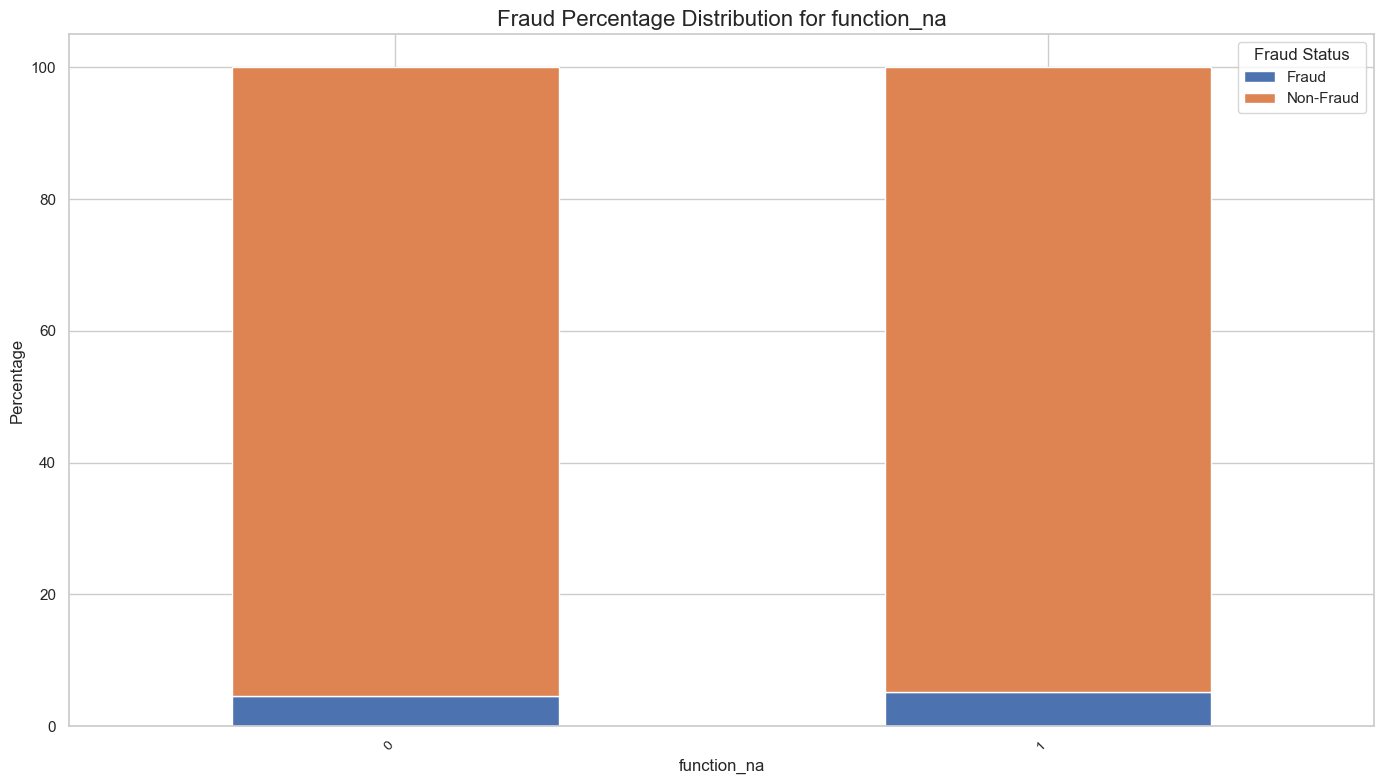

<Figure size 1400x800 with 0 Axes>

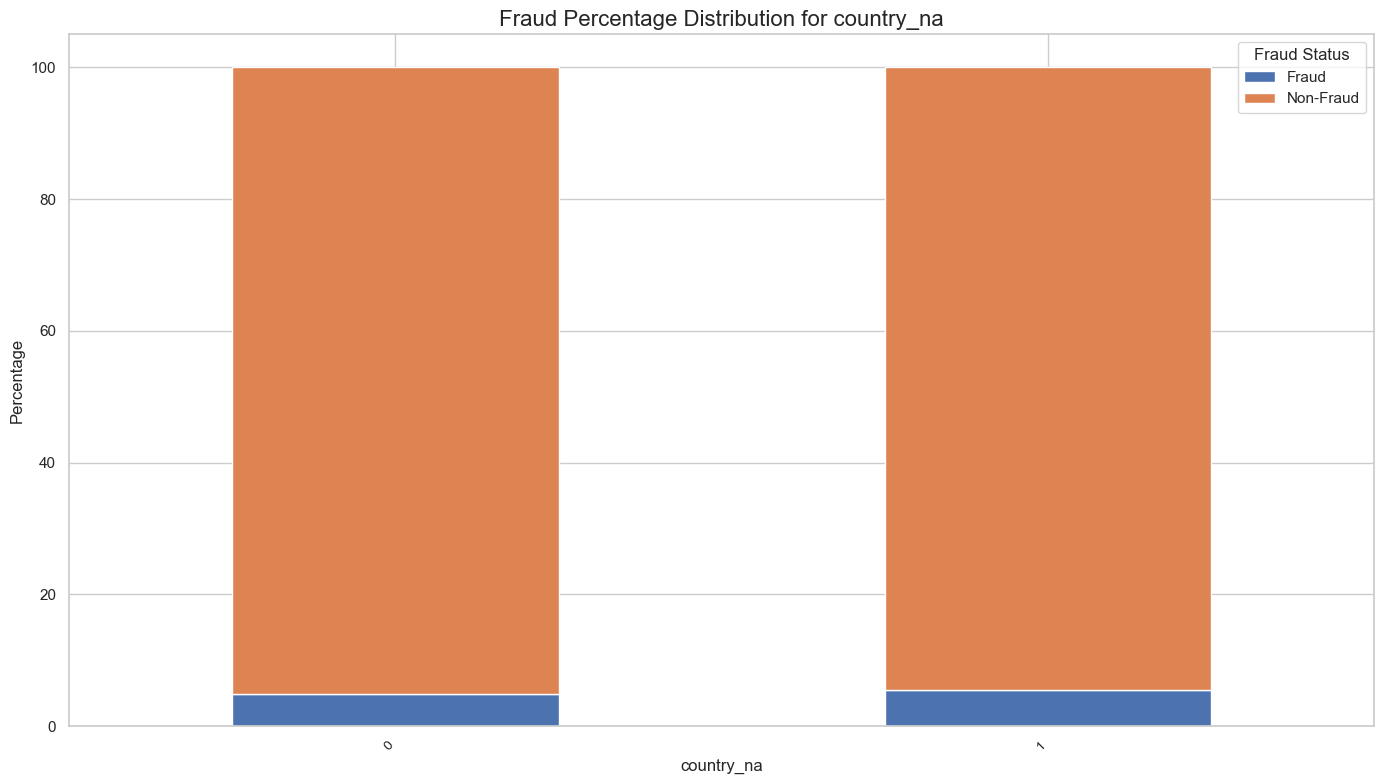

<Figure size 1400x800 with 0 Axes>

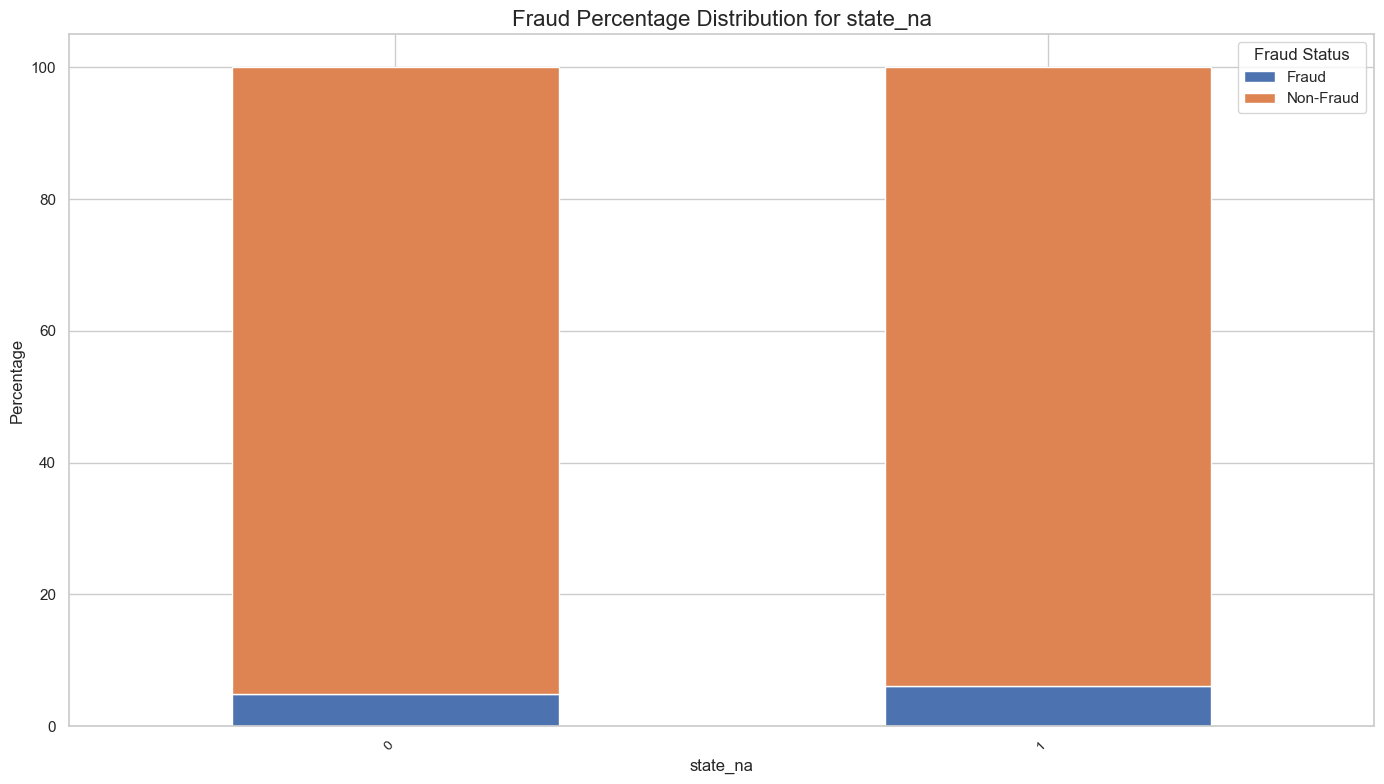

<Figure size 1400x800 with 0 Axes>

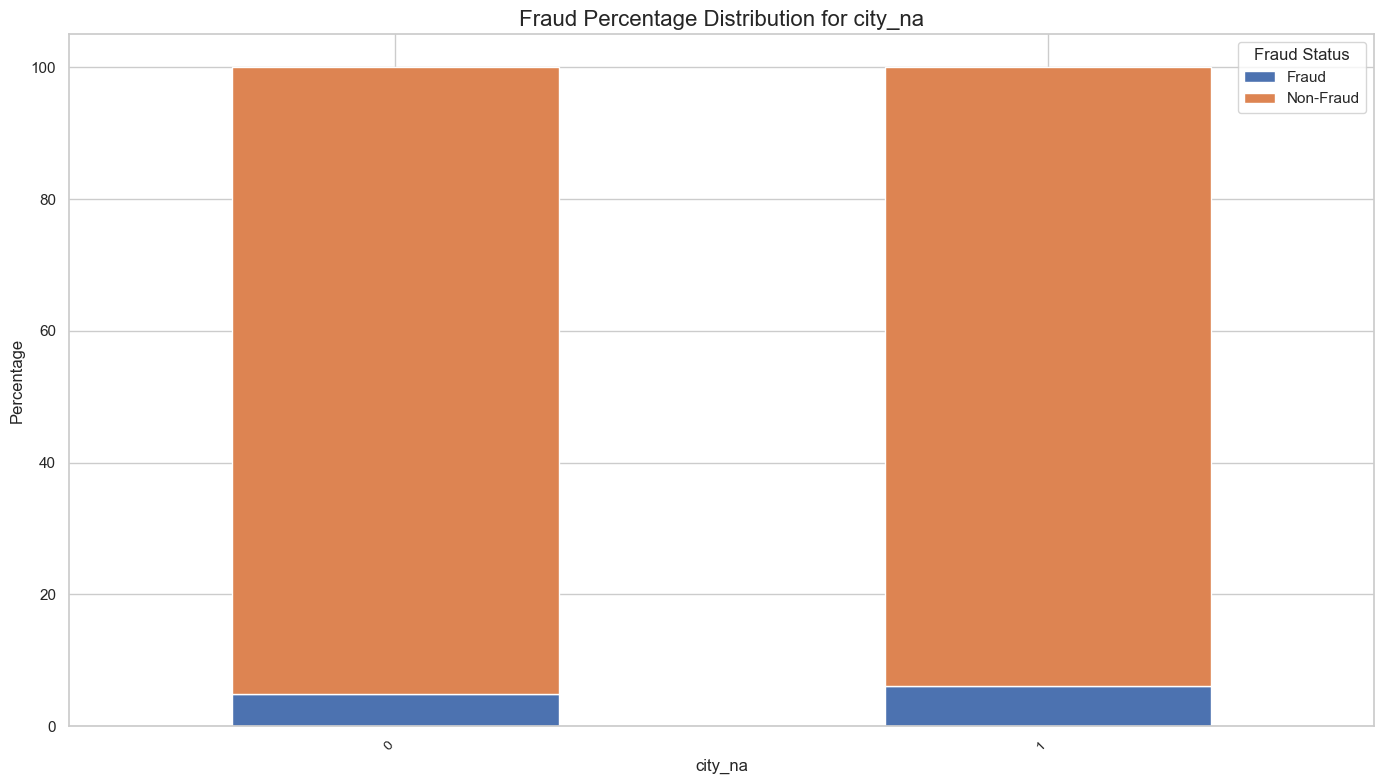

In [12]:
import matplotlib.pyplot as plt

cat_var = [
    'employment_type', 'required_education', 'industry', 'function', 
    'salary_na', 'department_na', 'company_profile_na', 
    'requirements_na', 'benefits_na', 'employment_type_na', 
    'required_experience_na', 'required_education_na', 'industry_na', 
    'function_na', 'country_na', 'state_na', 'city_na'
]

for var in cat_var:
    grouped = df.groupby([var, 'fraudulent']).size().unstack(fill_value=0)
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
    grouped_percentage = grouped_percentage[[1, 0]]  # Reordering columns for Fraud first

    # Check if the number of categories exceeds 10
    if len(grouped_percentage) > 10:
        # Sort by the fraudulent percentage and select the top 15
        grouped_percentage = grouped_percentage.sort_values(by=1, ascending=False).head(15)
    
    # Plot if there are any rows left
    if not grouped_percentage.empty:
        plt.figure(figsize=(14, 8))
        grouped_percentage.plot(
            kind='bar', stacked=True, figsize=(14, 8), legend=False
        )
        
        plt.title(f'Fraud Percentage Distribution for {var}', fontsize=16)
        plt.ylabel('Percentage', fontsize=12)
        plt.xlabel(var, fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.legend(title='Fraud Status', labels=['Fraud', 'Non-Fraud'])
        plt.tight_layout()
        plt.show()


##### Determine which is_NA columns to keep for further analysis

In [13]:
## Perform Chi Square test to determine whether the is_NA columns are signficant columns in predicting the target variable
from scipy.stats import chi2_contingency

na_columns = [
    'salary_na', 'department_na', 'company_profile_na', 
    'requirements_na', 'benefits_na', 'employment_type_na', 
    'required_experience_na', 'required_education_na', 'industry_na', 
    'function_na', 'country_na', 'state_na', 'city_na'
]

significant_columns = []
results = {}

for col in na_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['fraudulent'])
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store the results
    results[col] = {
        'Chi2': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    }
    
    # Check for significance (p-value < 0.05)
    if p < 0.01:
        significant_columns.append(col)

# Display the results
for col, res in results.items():
    print(f"Column: {col}")
    print(f"  Chi-Square: {res['Chi2']:.4f}")
    print(f"  p-value: {res['p-value']:.4f}")
    print(f"  Degrees of Freedom: {res['Degrees of Freedom']}")
    print("-" * 40)

# Output the significant column names
print("\nSignificant columns (p-value < 0.05):")
for col in significant_columns:
    print(f"- {col}")

# If no significant columns found
if not significant_columns:
    print("No columns have a statistically significant association with 'fraudulent'.")    

Column: salary_na
  Chi-Square: 63.2594
  p-value: 0.0000
  Degrees of Freedom: 1
----------------------------------------
Column: department_na
  Chi-Square: 4.1949
  p-value: 0.0405
  Degrees of Freedom: 1
----------------------------------------
Column: company_profile_na
  Chi-Square: 1459.0246
  p-value: 0.0000
  Degrees of Freedom: 1
----------------------------------------
Column: requirements_na
  Chi-Square: 4.6408
  p-value: 0.0312
  Degrees of Freedom: 1
----------------------------------------
Column: benefits_na
  Chi-Square: 0.9373
  p-value: 0.3330
  Degrees of Freedom: 1
----------------------------------------
Column: employment_type_na
  Chi-Square: 39.8379
  p-value: 0.0000
  Degrees of Freedom: 1
----------------------------------------
Column: required_experience_na
  Chi-Square: 43.4906
  p-value: 0.0000
  Degrees of Freedom: 1
----------------------------------------
Column: required_education_na
  Chi-Square: 16.1640
  p-value: 0.0001
  Degrees of Freedom: 1
---

In [14]:
# Split train-test for is_NA feature selection only
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X = df[na_columns]
y = df['fraudulent']


# Split your data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
## Use XGBoost feature importance to the is_NA columns
from sklearn.metrics import brier_score_loss, roc_auc_score

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,company_profile_na,0.556890
7,required_education_na,0.063436
6,required_experience_na,0.059127
0,salary_na,0.054928
5,employment_type_na,0.054873
1,department_na,0.052257
3,requirements_na,0.041130
8,industry_na,0.035107
9,function_na,0.027090
4,benefits_na,0.021109


In [16]:
# Perform RFE to select is_NA columns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Step 4: Initialize a model (Random Forest here, but could use others like XGBClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Apply RFE for feature selection
rfe = RFE(estimator=model, n_features_to_select=3)  # Select top 3 features (or any number based on your need)
rfe.fit(X_train, y_train)

# Step 6: Get selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features: ", selected_features)

# Step 7: Evaluate performance
y_pred = rfe.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


Selected Features:  Index(['company_profile_na', 'required_experience_na', 'industry_na'], dtype='object')
Accuracy:  0.9491051454138703


In [17]:
# Keep variables with high feature_importance (company_profile_na, required_experience_na, and industry_na) and drop the rest
modified_df = df.drop(columns=['salary_na', 'department_na',  
    'requirements_na', 'benefits_na', 'employment_type_na', 
    'required_education_na', 'function_na', 'country_na', 'state_na', 'city_na'])


In [18]:
# Merge text columns into one for easier text processing
modified_df['text_col'] = modified_df[['title', 'company_profile', 'description', 'requirements', 'benefits']].astype(str).apply(' ; '.join, axis=1)
modified_df = modified_df.drop(columns=['title', 'company_profile', 'description', 'requirements', 'benefits'])

In [19]:
# Drop redundant columns
modified_df = modified_df.drop(columns=["job_id", "department", "salary_range"])

In [20]:
modified_df.isnull().sum()

telecommuting                0
has_company_logo             0
has_questions                0
employment_type           3470
required_experience       7049
required_education        8104
industry                  4902
function                  6454
fraudulent                   0
country                    346
state                      440
city                       440
company_profile_na           0
required_experience_na       0
industry_na                  0
text_col                     0
dtype: int64

In [21]:
# Train-test split
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X = modified_df.drop(columns=['fraudulent'])
y = modified_df['fraudulent']

# Split your data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Perform predictive imputation on remaining categorical columns with NA values

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Function for predictive imputation
def predictive_imputation(df, col_to_impute):
    df[col_to_impute] = df[col_to_impute].replace("", np.nan) #Changing those with empty string to be nan as well since they are technically missing also
    # Identify rows with and without missing values
    df_missing = df[df[col_to_impute].isnull()]
    df_not_missing = df[~df[col_to_impute].isnull()]
    
    # Encode categorical data for features (but not the target column)
    label_encoders = {}
    df_missing_encoded = df_missing.copy()
    df_not_missing_encoded = df_not_missing.copy()

    # Apply LabelEncoder for other categorical columns in the features (not target column)
    for col in df.columns:
        if df[col].dtype == 'object' and col != col_to_impute:
            df_missing_encoded[col] = df_missing[col].astype(str).fillna("missing")
            df_not_missing_encoded[col] = df_not_missing[col].astype(str).fillna("missing")
            
            # Handle both float and string types correctly by casting everything to str
            temp_labels = df[col].astype(str).fillna("missing").unique()
            temp_labels = np.array([str(label) for label in temp_labels])  # Convert all to string
            #print(temp_labels)
            le = LabelEncoder()
            le.fit(temp_labels)
            #print(le.classes_)
            df_missing_encoded[col] = le.transform(df_missing_encoded[col])
            df_not_missing_encoded[col] = le.transform(df_not_missing_encoded[col])
            label_encoders[col] = le
    
    # Handle missing target column consistently
    # Create a label encoder for the target column
    le_target = LabelEncoder()
    all_labels = df[col_to_impute].astype(str).unique()
    all_labels = np.array([label for label in all_labels if label.strip() != ""]) #Making sure the labels is not an empty string also 
    #pd.concat([df_not_missing[col_to_impute], df_missing[col_to_impute].fillna("missing")]).unique()
    le_target.fit(all_labels)  # Fit with all possible labels, including "missing"

    #df_missing_encoded[col_to_impute] = le.transform(df_missing_encoded[col_to_impute])
    df_not_missing_encoded[col_to_impute] = le_target.transform(df_not_missing_encoded[col_to_impute])
    
    # Train a classifier to predict missing values
    X_train = df_not_missing_encoded.drop(columns=[col_to_impute])
    y_train = df_not_missing_encoded[col_to_impute]
    X_pred = df_missing_encoded.drop(columns=[col_to_impute])

    # Fit the model
    model = RandomForestClassifier(random_state=5)
    model.fit(X_train, y_train)
    
    # Predict missing values
    y_pred = model.predict(X_pred)
    #print(le.classes_)
    #print(y_pred)
    
    # Decode predictions back to original categories
    y_pred_decoded = le_target.inverse_transform(y_pred)

    # Impute the missing values in the original DataFrame
    df.loc[df[col_to_impute].isnull(), col_to_impute] = y_pred_decoded
    
    return df

# Define columns to impute
col_to_impute = ['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country', 'state', 'city']

# Apply the function to columns with missing values
for col in col_to_impute:
    print(col)
    if modified_df[col].isnull().sum() > 0:
        modified_df = predictive_imputation(modified_df, col)


employment_type
required_experience
required_education
industry
function
country
state
city


In [23]:
modified_df.isnull().sum()

telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
fraudulent                0
country                   0
state                     0
city                      0
company_profile_na        0
required_experience_na    0
industry_na               0
text_col                  0
dtype: int64

#### Train-test Split

In [24]:
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X = modified_df.drop(columns=['fraudulent'])
y = modified_df['fraudulent']

# Split your data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Text Processing

In [25]:
# Import libraries for text processing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize necessary tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

## Define a function for text preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers using regex
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text into words
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Apply stemming
    words = [stemmer.stem(word) for word in words]
    # Apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the processed words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the description column
X_train['text_col'] = X_train['text_col'].apply(preprocess_text)
# X_test['description'] = X_test['description'].apply(preprocess_text)
X_test['text_col'] = X_test['text_col'].apply(preprocess_text)

# Define TF-IDF vectorizers with max 100 features for each column
tfidf_desc_vectorizer = TfidfVectorizer(max_features=1000)

## Apply TFIDF on text_col
tfidf_train_desc = tfidf_desc_vectorizer.fit_transform(X_train['text_col'].astype(str))
tfidf_test_desc = tfidf_desc_vectorizer.transform(X_test['text_col'].astype(str))
tfidf_train_desc_df = pd.DataFrame(tfidf_train_desc.toarray(), columns=[f'desc_{word}' for word in tfidf_desc_vectorizer.get_feature_names_out()])
tfidf_test_desc_df = pd.DataFrame(tfidf_test_desc.toarray(), columns=[f'desc_{word}' for word in tfidf_desc_vectorizer.get_feature_names_out()])

# Combine numeric features and TF-IDF features
X_train = pd.concat([X_train.reset_index(drop=True), tfidf_train_desc_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), tfidf_test_desc_df.reset_index(drop=True)], axis=1)


In [26]:
# CountVectorizer on text_col
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=500)
count_matrix = count_vectorizer.fit_transform(X_train['text_col'])
val_count_matrix = count_vectorizer.transform(X_test['text_col'])
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda_matrix = lda.fit_transform(count_matrix)
val_lda_matrix = lda.transform(val_count_matrix)


# Add topic probabilities to dataframe
lda_df = pd.DataFrame(lda_matrix, columns=[f'topic_{i}' for i in range(5)])
X_train = pd.concat([X_train.reset_index(drop=True), lda_df], axis=1)

val_lda_df = pd.DataFrame(val_lda_matrix, columns=[f'topic_{i}' for i in range(5)])
X_test = pd.concat([X_test.reset_index(drop=True), val_lda_df], axis=1)

In [27]:
X_train.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,country,state,...,desc_year,desc_york,desc_youll,desc_young,desc_your,topic_0,topic_1,topic_2,topic_3,topic_4
0,0,1,1,Full-time,Associate,Bachelor's Degree,Internet,Marketing,ee,37,...,0.072956,0.0,0.0,0.0,0.079133,0.001913,0.001911,0.103113,0.891138,0.001925
1,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Marketing,us,ny,...,0.033895,0.0,0.0,0.0,0.000000,0.041648,0.000874,0.149535,0.040894,0.767049
2,0,1,1,Full-time,Associate,Bachelor's Degree,Internet,Business Development,us,ny,...,0.025124,0.0,0.0,0.0,0.000000,0.001259,0.130658,0.170898,0.356276,0.340909
3,0,1,1,Full-time,Not Applicable,Bachelor's Degree,Consumer Electronics,Engineering,us,ma,...,0.036991,0.0,0.0,0.0,0.080246,0.592386,0.001837,0.001838,0.402095,0.001843
4,0,1,1,Part-time,Internship,Some College Coursework Completed,Internet,Art/Creative,us,ca,...,0.038298,0.0,0.0,0.0,0.000000,0.662423,0.100812,0.002308,0.142372,0.092085


In [28]:
#Apply One Hot Encoding to categorical columns
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

train_encoded = oneHotEncoder.fit_transform(X_train[['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country', 'state', 'city']])

train_encoded_df = pd.DataFrame(train_encoded, columns=oneHotEncoder.get_feature_names_out(['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country', 'state', 'city']))
train_combined = pd.concat([X_train, train_encoded_df], axis=1)
X_train = train_combined.drop(columns=['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country', 'state', 'city'])

test_encoded = oneHotEncoder.transform(X_test[['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country', 'state', 'city']])
test_encoded_df = pd.DataFrame(test_encoded, columns=oneHotEncoder.get_feature_names_out(['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country', 'state', 'city']))
test_combined = pd.concat([X_test, test_encoded_df], axis=1)
X_test = test_combined.drop(columns=['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country', 'state', 'city'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [29]:
# Drop text_col after text processing
X_train = X_train.drop(columns=["text_col"])
X_test = X_test.drop(columns=["text_col"])

#### Perform SMOTE to handle imbalanced dataset

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [31]:
X_train_smote

,telecommuting,has_company_logo,has_questions,company_profile_na,required_experience_na,industry_na,desc_abil,desc_abl,desc_abroad,desc_accept,...,city_yorba linda,city_york,city_yorktown heights,city_youngstown,city_zurich,city_zürich,city_αthens,city_αθήνα,city_ελληνικο,city_마포구 동교동
0,0,1,1,0,1,1,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,1,1,0.022455,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0,0,0,0.000000,0.076870,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,0,0,0,0.098024,0.056590,0.0,0.099288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0,0,0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27235,0,0,0,1,1,1,0.000000,0.241212,0.0,0.282140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27236,1,0,0,1,0,1,0.000000,0.094929,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27237,0,1,1,0,0,0,0.025131,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27238,0,0,0,1,1,0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
xgb_model = xgb.XGBClassifier(random_state=15)
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=15, ...)

In [33]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance (optional)
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

columns_to_drop = importance_df[importance_df['Importance'] == 0]['Feature'].tolist()

In [34]:
X_train_smote_dropped = X_train_smote.drop(columns=columns_to_drop)
X_test_dropped = X_test.drop(columns=columns_to_drop)
X_train_dropped = X_train.drop(columns=columns_to_drop)

In [35]:
#Exporting the files 
X_train_smote_dropped.to_csv('X_train_smote_dropped.csv')
X_test_dropped.to_csv('X_test_dropped.csv')
X_train_dropped.to_csv('X_train_dropped.csv')

y_test.to_csv('y_test.csv')
y_train_smote.to_csv('y_train_smote.csv')
y_train.to_csv('y_train.csv')

In [36]:
import joblib
joblib.dump(model, 'xgb_model.pkl')  # Save to a pickle file


['xgb_model.pkl']